## Comparison Sarsa and Q-Learning
### FrozenLake

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import sys
sys.path.append('../agents')
sys.path.append('../environments')
sys.path.append('../tools')

import gym
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from utils import *
from QLearning import QLearning
from SARSA import SARSA
from MonteCarlo import MonteCarloEV, MonteCarloFV

%matplotlib inline

In [3]:
# initialize env
env = Experiment(gym.make('FrozenLake-v0'))

tries = 10
episodes = 1000
results_QLearning = np.zeros((tries, episodes))
results_MonteCarlo = np.zeros((tries, episodes))

### Learning Rate study

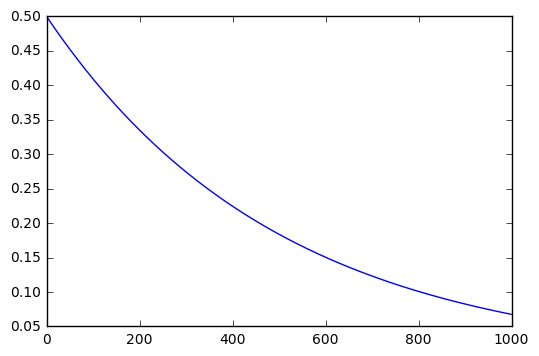

In [4]:
ts = []
lr = .5
episodes = int(1e3)
decay = 1-(1/episodes)*2
for _ in range(episodes):
    ts.append(lr)
    lr = lr*decay

plt.plot(ts)

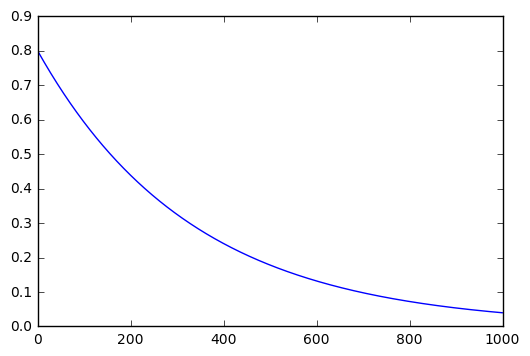

In [43]:
ts = []
lr = .8
episodes = int(1e3)
decay = 1-(1/episodes)*3
for _ in range(episodes):
    ts.append(lr)
    lr = lr*decay

plt.plot(ts)

### Q-Learning

In [6]:
epsilon_decay = 1-(1/episodes)*3
learning_decay = 1-(1/episodes)*2


In [23]:
tries =1
episodes = 100
results_QLearning = np.zeros((tries, episodes))
for t in range(tries):

    agent = QLearning(env.env, learning_rate =0.5, discount_factor=0.9, 
                      exploration_rate=0,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_QLearning[t, :] = agent.rewards_per_episode

### Monte Carlo Control

In [49]:
tries =3
episodes = 3000
results_MonteCarlo = np.zeros((tries, episodes))
epsilon_decay = 1-(1/episodes)*2

for t in range(tries):
    agent = MonteCarlo(env.env, discount_factor=0.9, 
                      exploration_rate=0.8,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      qtable_default=1
                     )
    # fit and save results
    env.fit(agent, episodes)
    results_MonteCarlo[t, :] = agent.rewards_per_episode


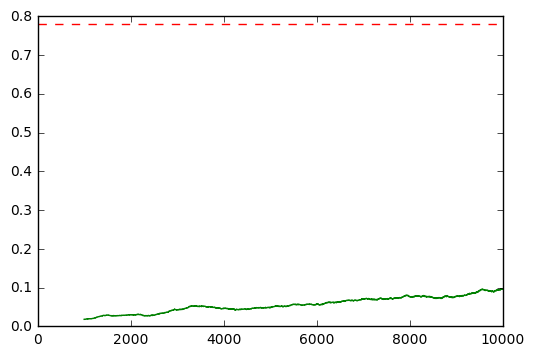

In [45]:
# 3x10000 episodes, qtable default = 0
plot_rewards(np.mean(results_MonteCarlo, axis=0), smoothing=0.1, color='green')

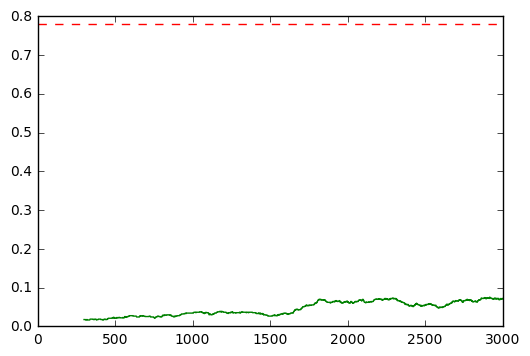

In [50]:
# 3x3000 episodes, qtable default =1
plot_rewards(np.mean(results_MonteCarlo, axis=0), smoothing=0.1, color='green')

Open questions:
- Why does it take so long for Monte Carlo to converge? And will it eventually converge? Is it related to the learning rate?
- And why the unusual qtable compared to QLearning qtable?
- Can I speed up learning table somehow? 

The probable reasons it learns so slowly:
- It takes a successful episode to backpropagate a positive signal. These are rare to find. 
- It doesn't make a lot of difference initializing qtable to 1, since I'm not using these values to bootstrap prediction. It does increase chance of exploration, but the problem of slow learning remains

The value of TD over MonteCarlo is clear in this case, where the rewards are sparse

### 